In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from IPython.display import Markdown as md

Getting data

In [3]:
data = pd.read_csv("COBE_CMB_data.txt", sep=" ")
data

,frequency (Hz),brightness (ergs/s/cm^2/sr/Hz)
0,3.447358e+10,7.029472e-16
1,4.289696e+10,1.025318e-15
2,5.132233e+10,1.354405e-15
3,6.034453e+10,1.690207e-15
4,6.876791e+10,2.012578e-15
5,7.778013e+10,2.314800e-15
6,8.560070e+10,2.610307e-15
7,9.401010e+10,2.885665e-15
8,1.024075e+11,3.120727e-15
9,1.113938e+11,3.335641e-15


Plotting Data


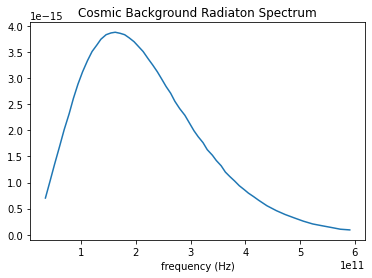

In [4]:
fstr = "frequency (Hz)"
bstr = "brightness (ergs/s/cm^2/sr/Hz)"
plt.plot(data[fstr], data[bstr])
plt.title("Cosmic Background Radiaton Spectrum")
plt.xlabel(fstr)
plt.show(bstr)

Creating and testing Blackbody radiation function

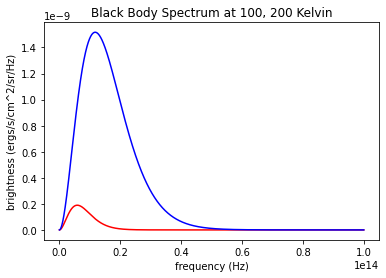

In [5]:
h = 6.6261e-27 # cm2 g s-1
k = 1.3807e-16 #cm2 g s-2 K-1
c = 2.99792458e10 #cm s-1
def black_body(freq, temp):
    return ((2*h*(freq**3))/(c**2))*(1/(np.e**((h*freq)/(k*temp))-1))

x = np.arange(1e10,1e14,1e10)
T = 100
plt.plot(x,black_body(x,T), c="red")
plt.plot(x,black_body(x,2*T), c="blue")
plt.title(f"Black Body Spectrum at {T}, {2*T} Kelvin")
plt.xlabel(fstr)
plt.ylabel(bstr)
plt.show()


Fitting function to data

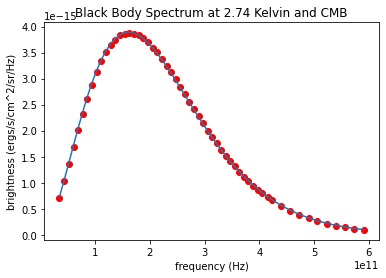

In [9]:
Temp, _ = scipy.optimize.curve_fit(black_body,data[fstr], data[bstr])
Temp = Temp[0]

plt.scatter(data[fstr], data[bstr], c="red")
plt.plot(data[fstr], black_body(data[fstr], Temp))
plt.title(f"Black Body Spectrum at {'{:.2f}'.format(Temp)} Kelvin and CMB")
plt.xlabel(fstr)
plt.ylabel(bstr)
plt.show()

In [7]:
md(f'''Its an almost perfect fit.\\
Temperature obtained is ${Temp}$ K''')

Its an almost perfect fit.\
Temperature obtained is $2.7379589782804308$ K